# Distribution of Feature Values

This notebook visualizes the distribution of values for the following features in the dataset:

- mood, energy, health (values: -1, 0, 1)
- stress, sleep, exercise (values: TRUE, FALSE)
  Each feature is shown as a bar chart, all in one frame.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Load the dataset
data = pd.read_csv("TSDA8-daily-data-filtered.csv")

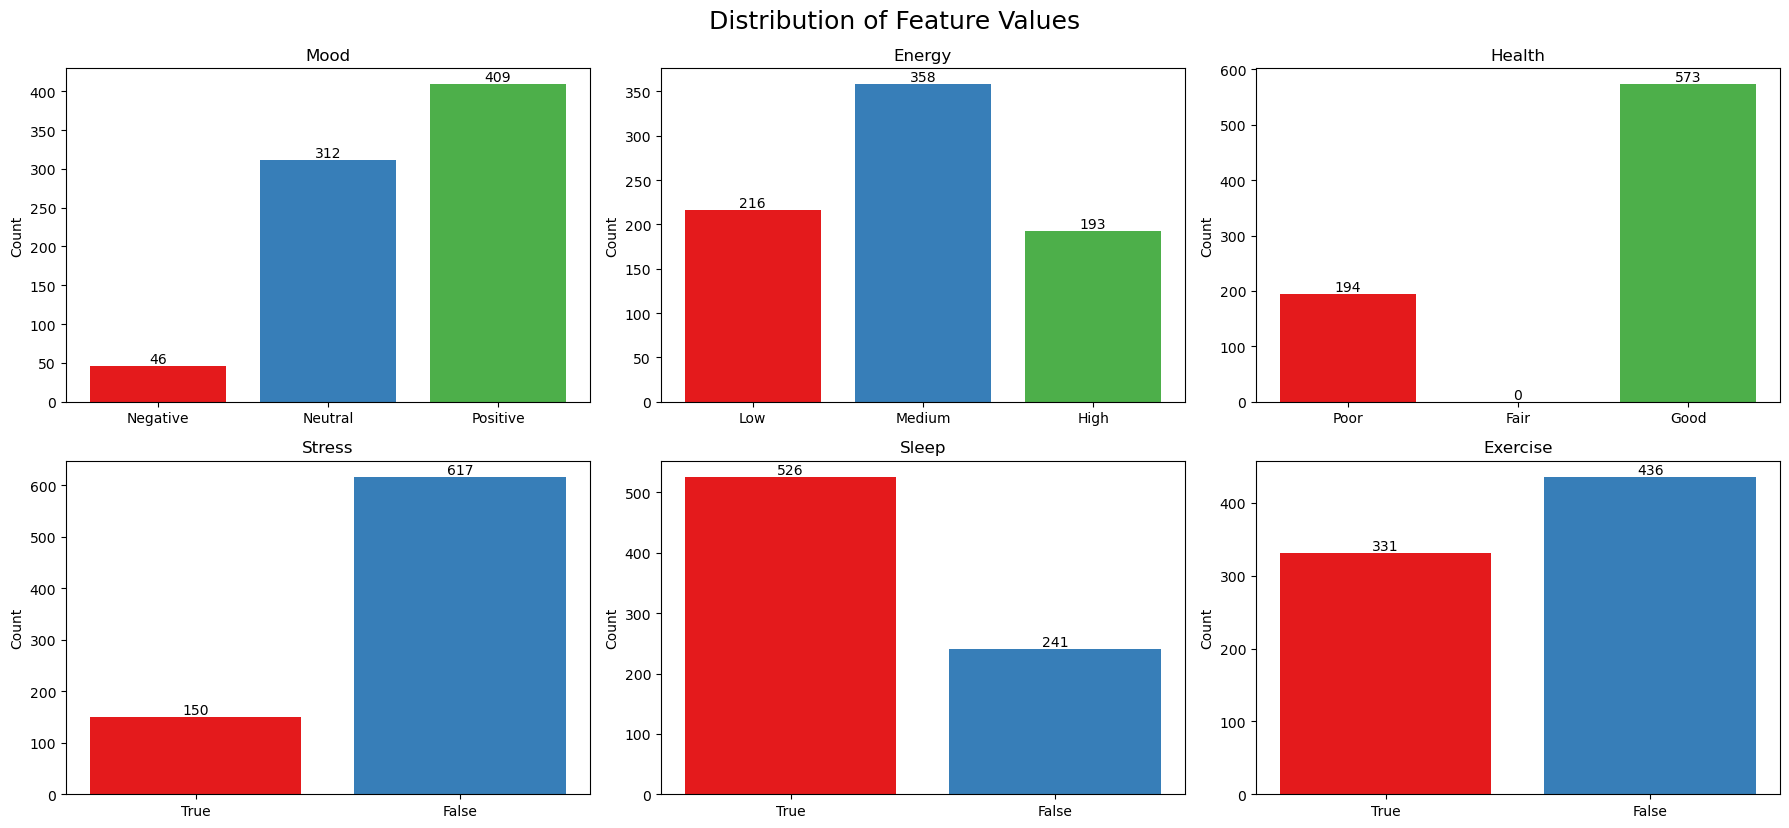

In [24]:
# Define features, values, labels, and colors
# Use consistent colors for all features: -1/Negative/Low/Poor=True: '#e41a1c', 0/Neutral/Medium/Fair=False: '#377eb8', 1/Positive/High/Good: '#4daf4a'
triple_colors = ["#e41a1c", "#377eb8", "#4daf4a"]
bool_colors = ["#e41a1c", "#377eb8"]

triple_features = [
    ("mood", [-1, 0, 1], ["Negative", "Neutral", "Positive"]),
    ("energy", [-1, 0, 1], ["Low", "Medium", "High"]),
    ("health", [-1, 0, 1], ["Poor", "Fair", "Good"]),
]
bool_features = [
    ("stress", [True, False], ["True", "False"]),
    ("sleep", [True, False], ["True", "False"]),
    ("exercise", [True, False], ["True", "False"]),
]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Plot triple-valued features with consistent colors and count labels
for idx, (feature, values, labels) in enumerate(triple_features):
    ax = axes[0, idx]
    counts = [(data[feature] == v).sum() for v in values]
    bars = ax.bar(labels, counts, color=triple_colors)
    ax.set_title(feature.capitalize())
    ax.set_ylabel("Count")
    # Add count labels
    for bar, count in zip(bars, counts):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(count),
            ha="center",
            va="bottom",
            fontsize=10,
        )

# Plot boolean features with consistent colors and count labels
for idx, (feature, values, labels) in enumerate(bool_features):
    ax = axes[1, idx]
    bool_col = data[feature].astype(str).str.upper().map({"TRUE": True, "FALSE": False})
    counts = [(bool_col == v).sum() for v in values]
    bars = ax.bar(labels, counts, color=bool_colors)
    ax.set_title(feature.capitalize())
    ax.set_ylabel("Count")
    # Add count labels
    for bar, count in zip(bars, counts):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(count),
            ha="center",
            va="bottom",
            fontsize=10,
        )

plt.tight_layout()
plt.suptitle("Distribution of Feature Values", fontsize=18, y=1.03)
plt.show()

ac437c68-8004-44e3-b040-d3df290640e7
f81216e0-6bd4-4898-a2b4-93221eb6f9f8
59202f98-62df-4ef3-b635-30c59c67c14a
854e7492-4d0e-40be-949e-8c6c9481361f
8900446e-b017-412c-8e30-de0653f2c47e
6cc7d6ce-bcc4-4ad1-bed4-a56b9a89c322
367e733a-ee38-4cf8-9a62-d7c27f376dfb
2b959a05-4cca-4904-982f-8423f7becc50
566ec466-0ac4-4443-88c6-856c08611bb9
3b91ab91-7c34-4d54-87e5-09348bc27e68
6e040781-ab14-475e-8e7f-787f8763cc1f
ca282e93-a3d2-4ad1-aa0b-07c8a10dca93
40fadbed-355e-46c6-8e2c-fc3094f7ea3c
8eb700ae-aa48-45f2-8d34-f75d3a114b7d
ddbe2b73-6918-4023-9b1a-25a4274567c8
493e0cfb-f7a5-4ce8-9c67-d699786ce19b


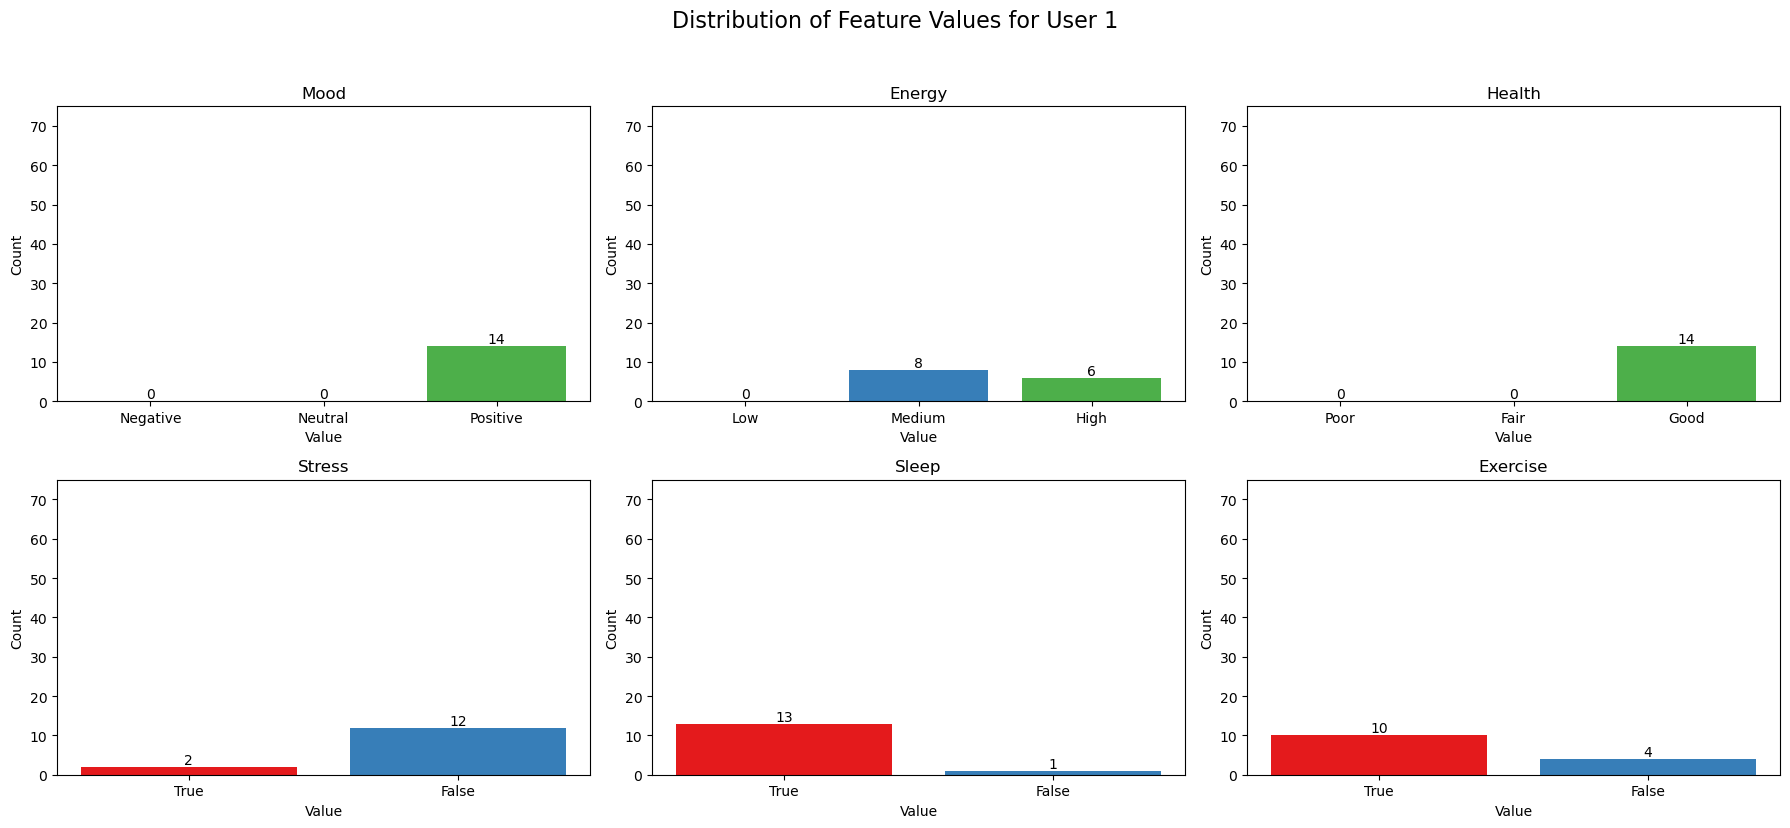

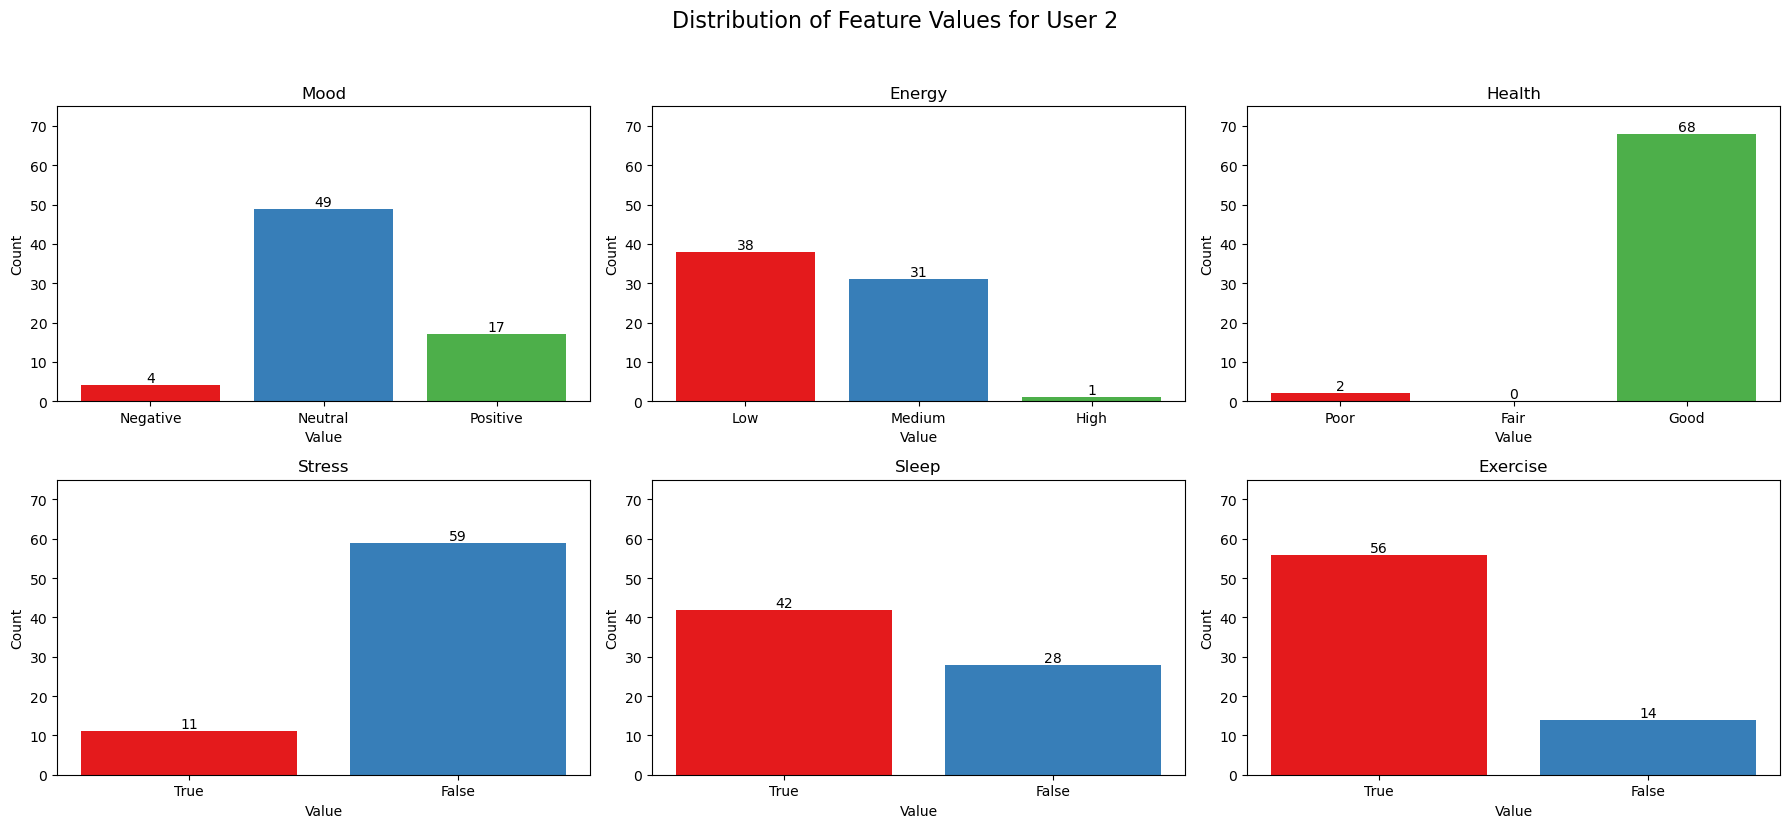

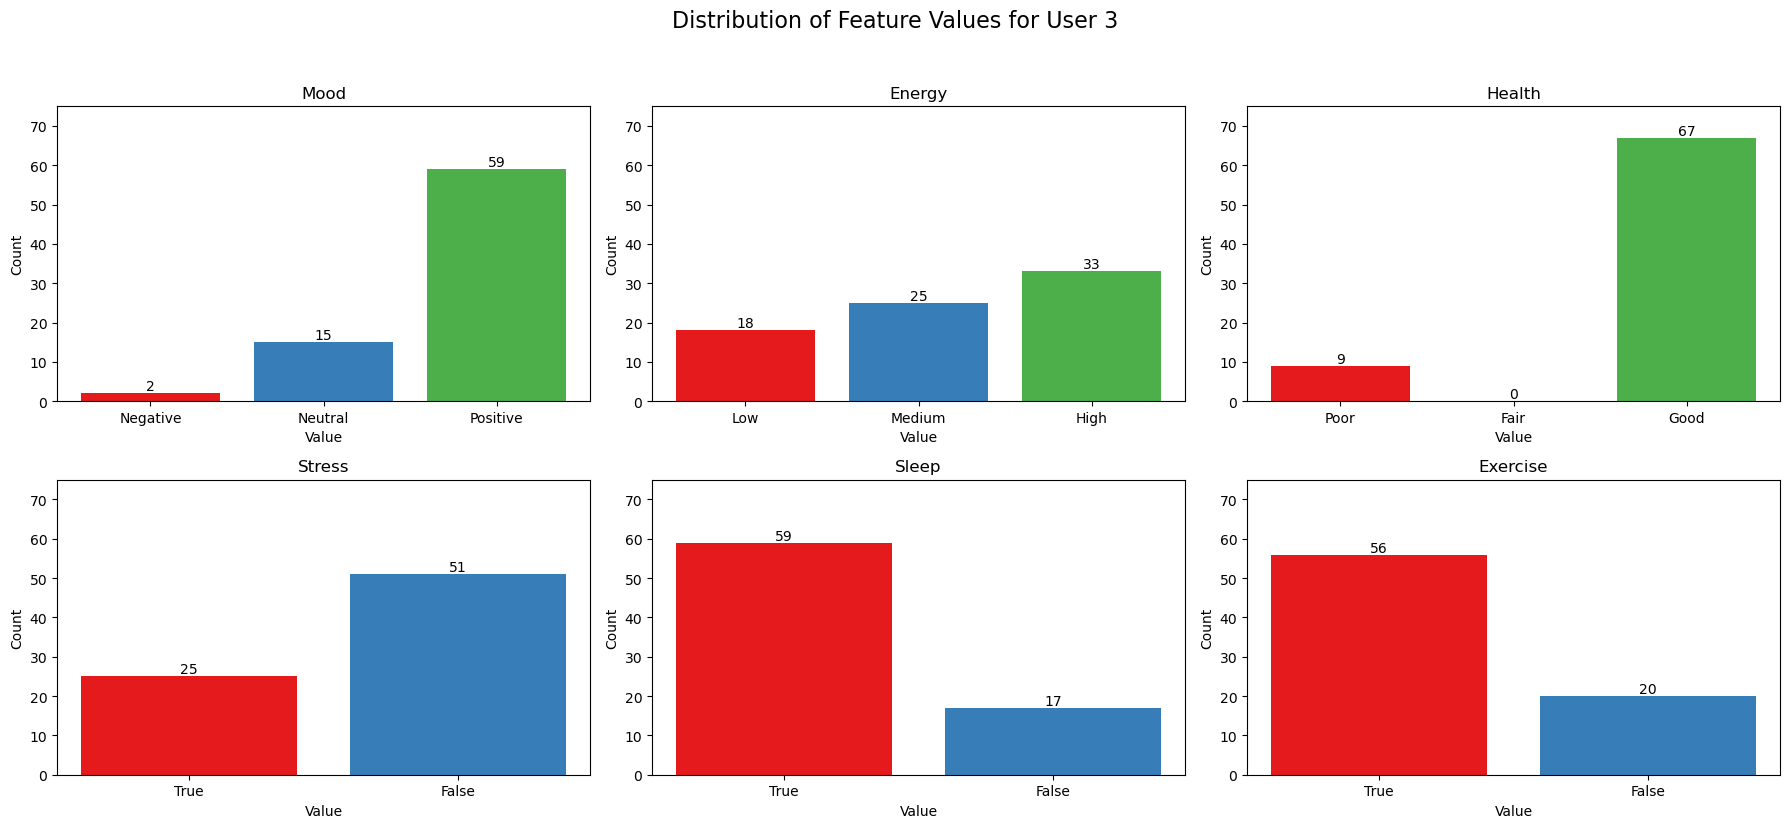

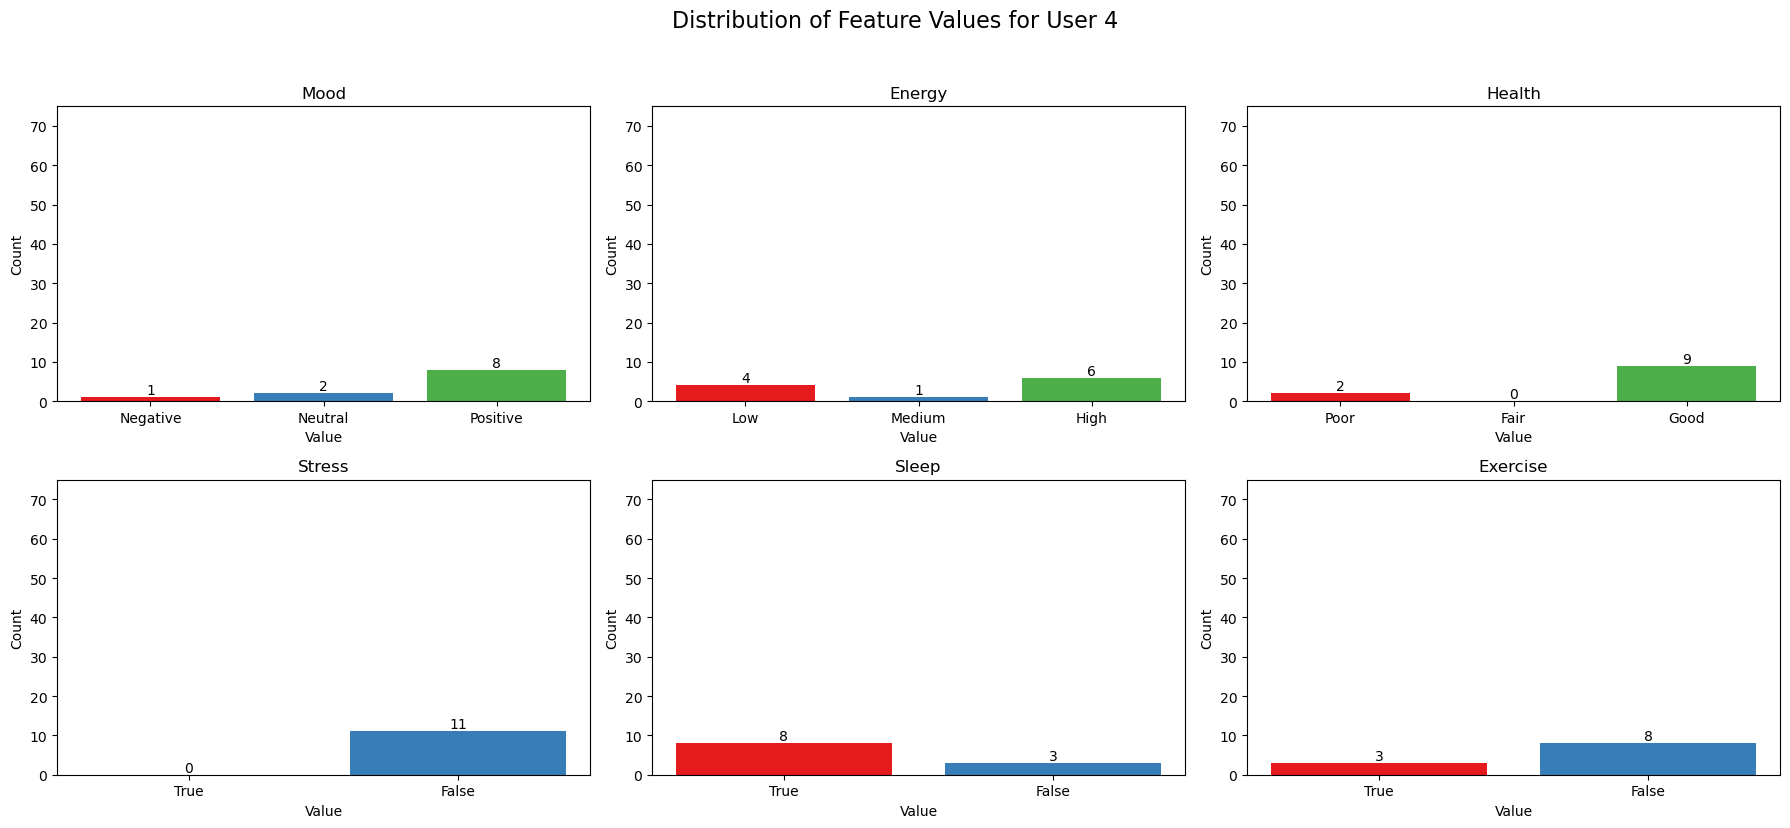

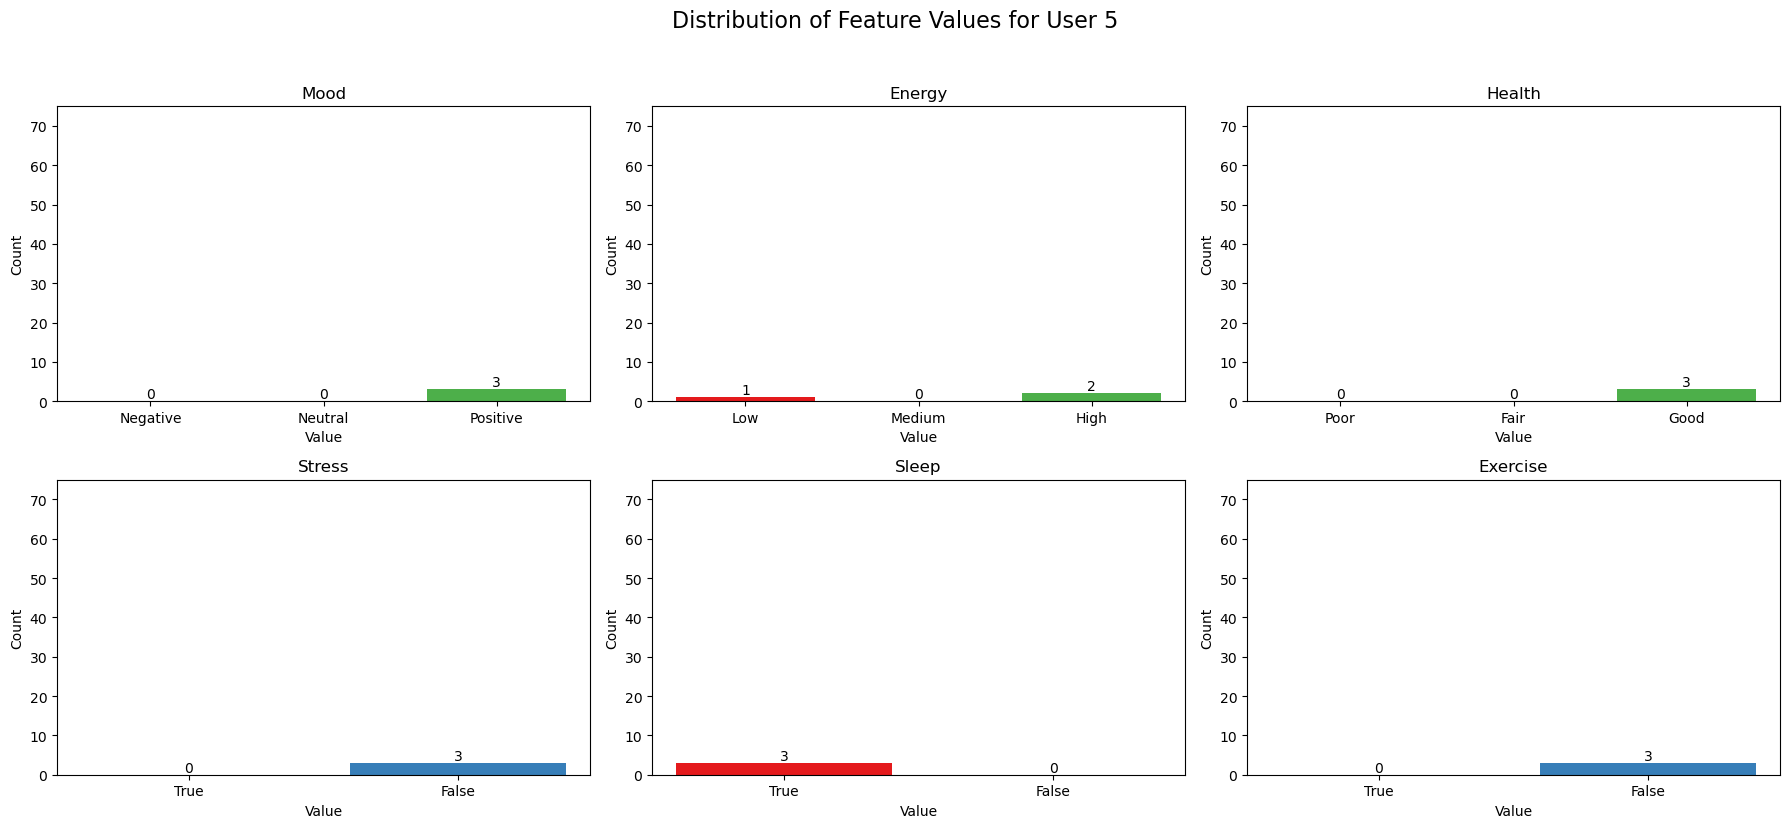

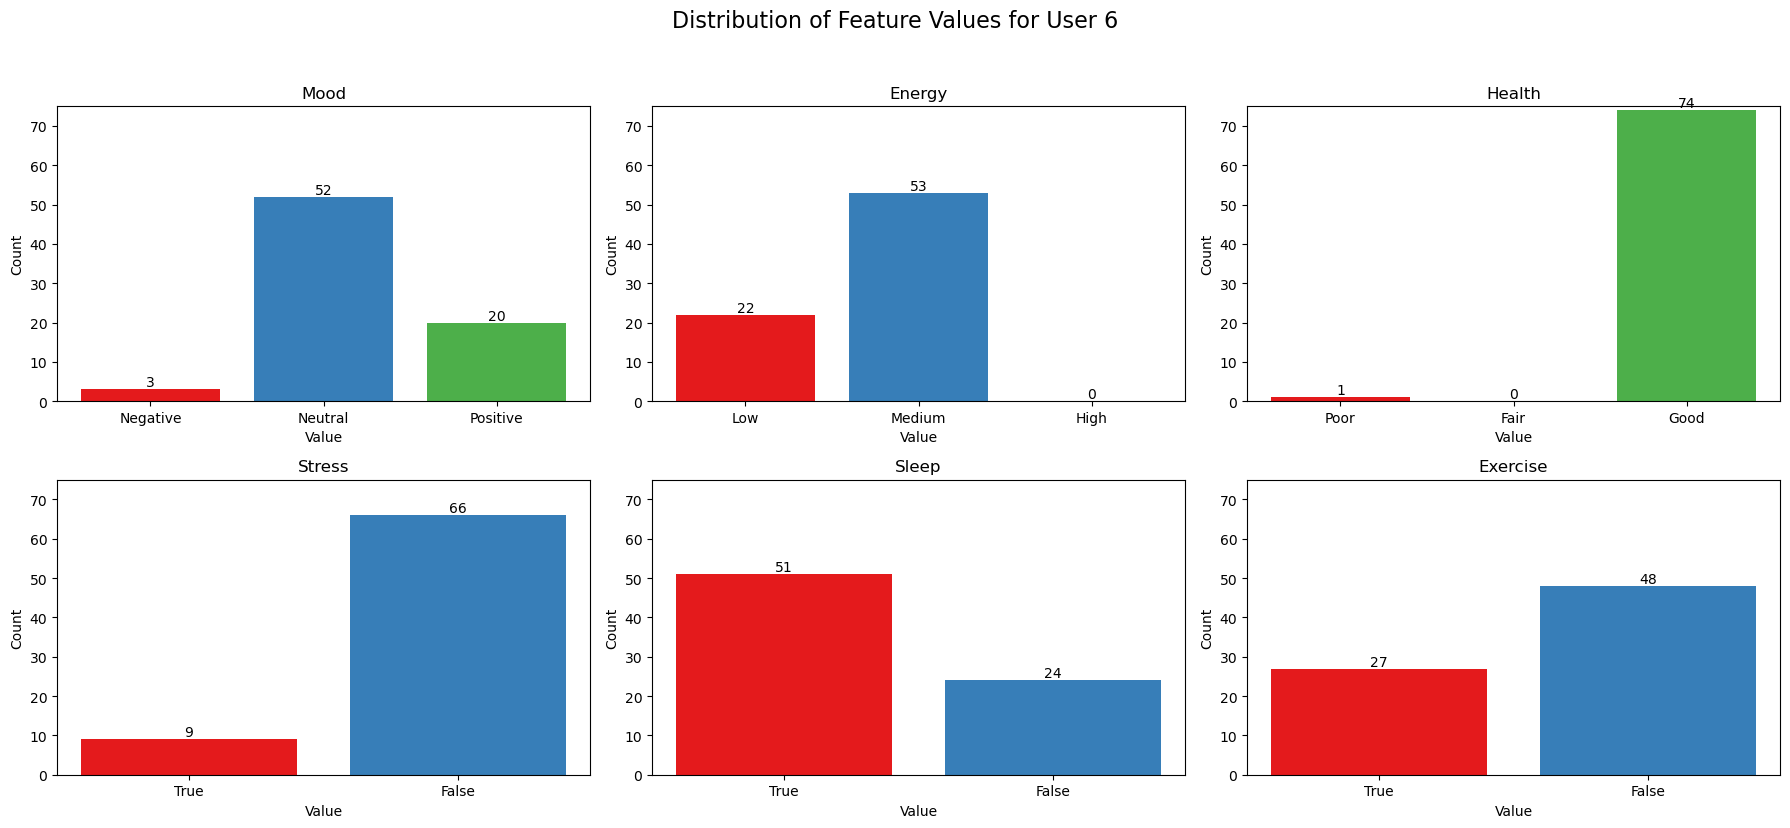

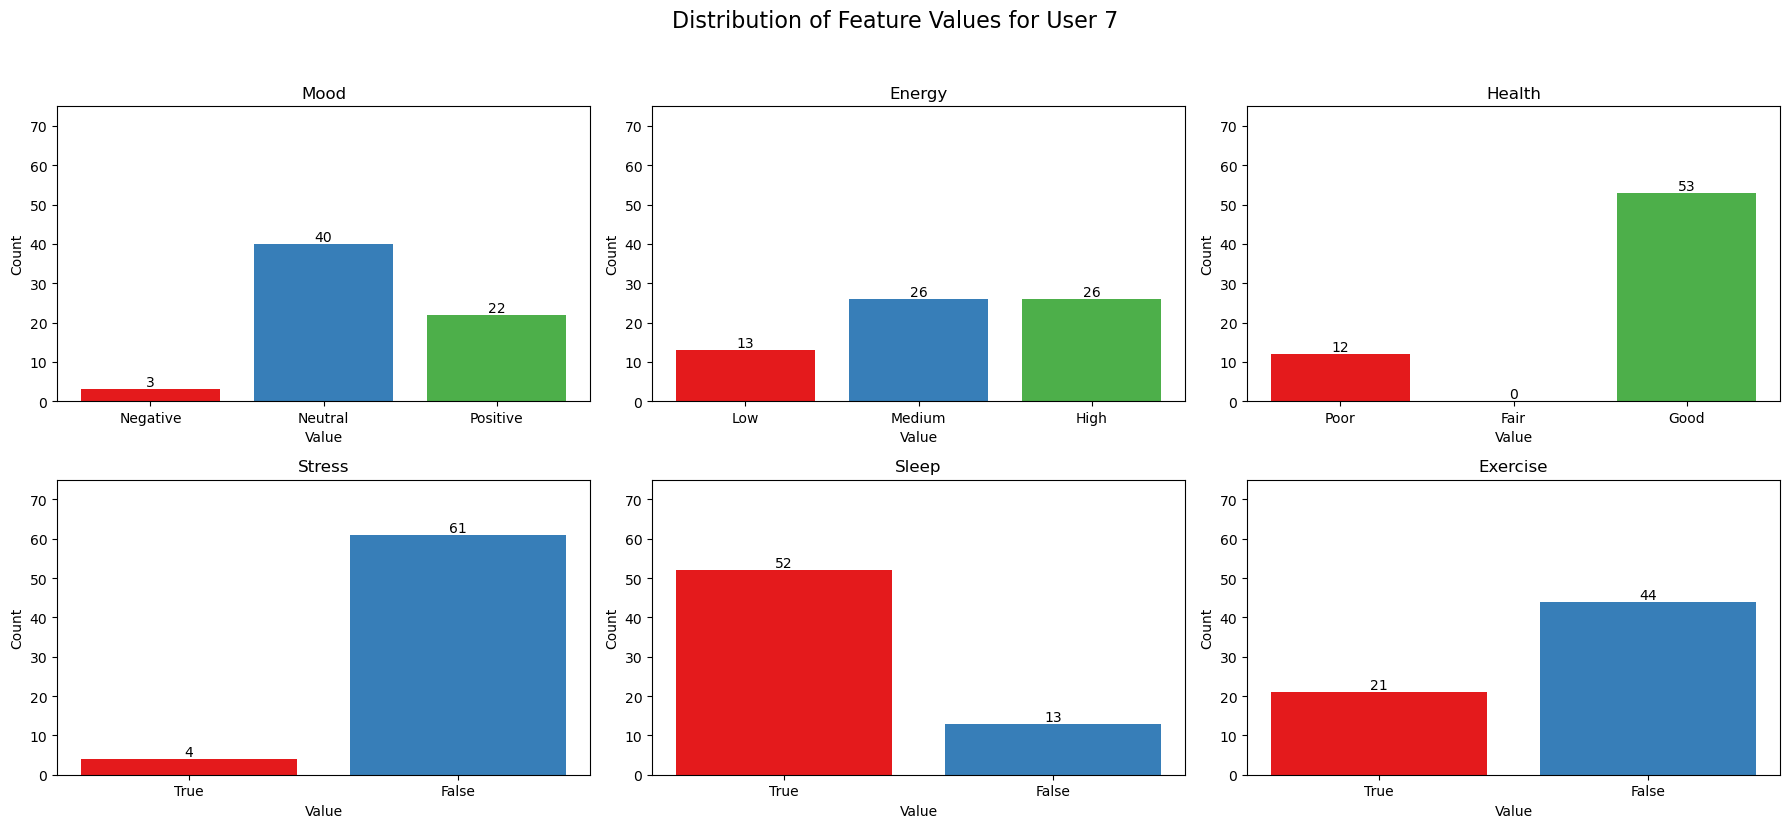

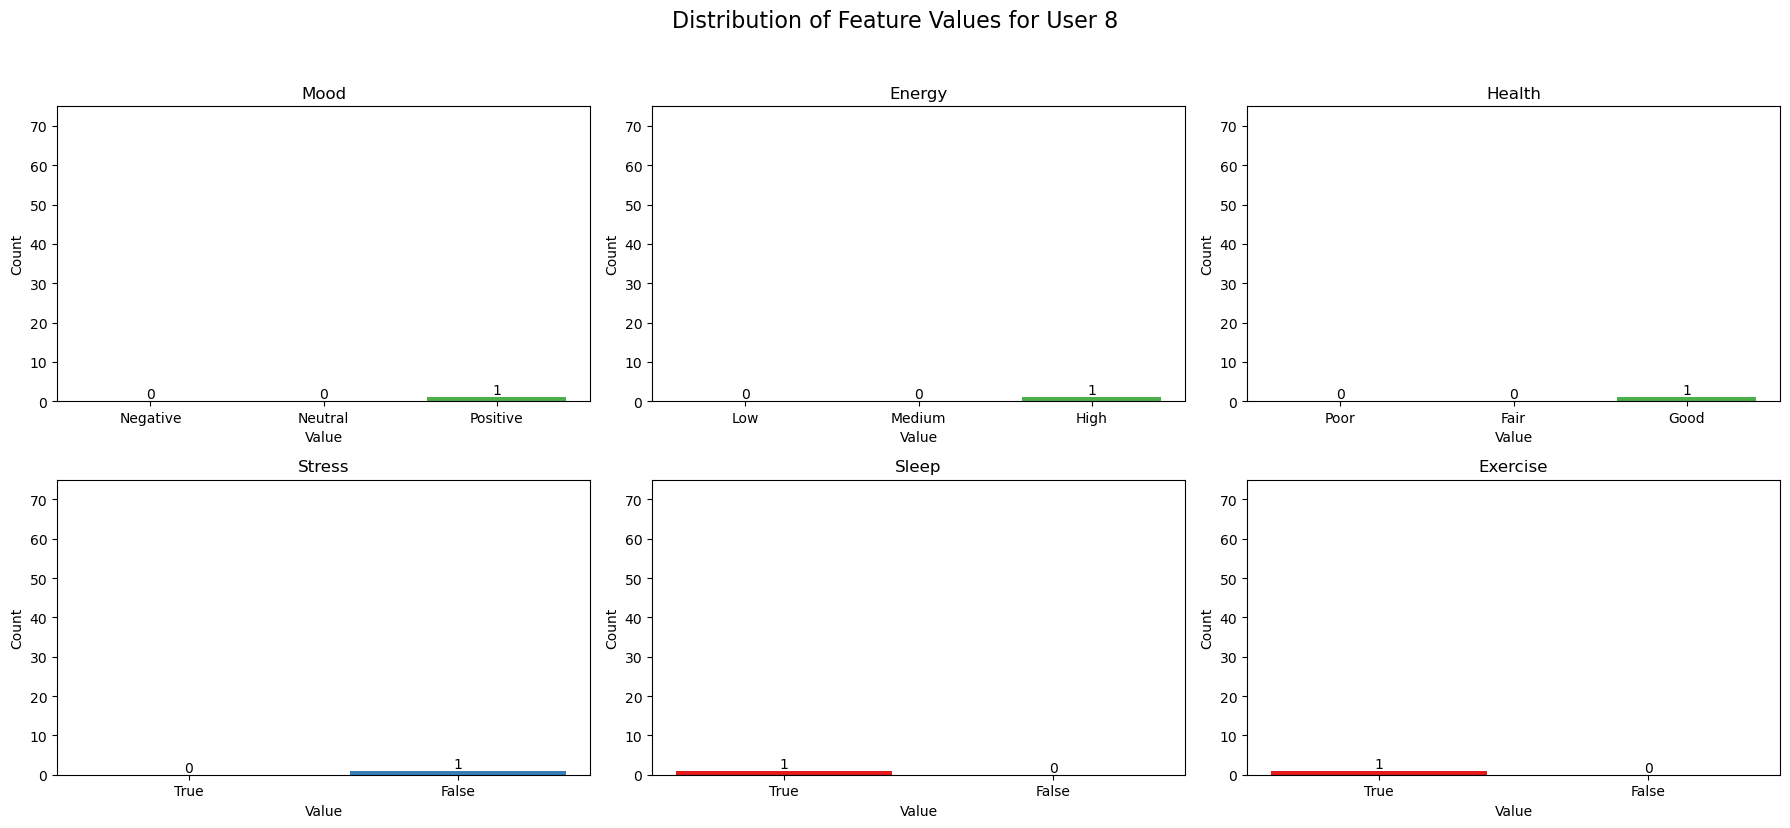

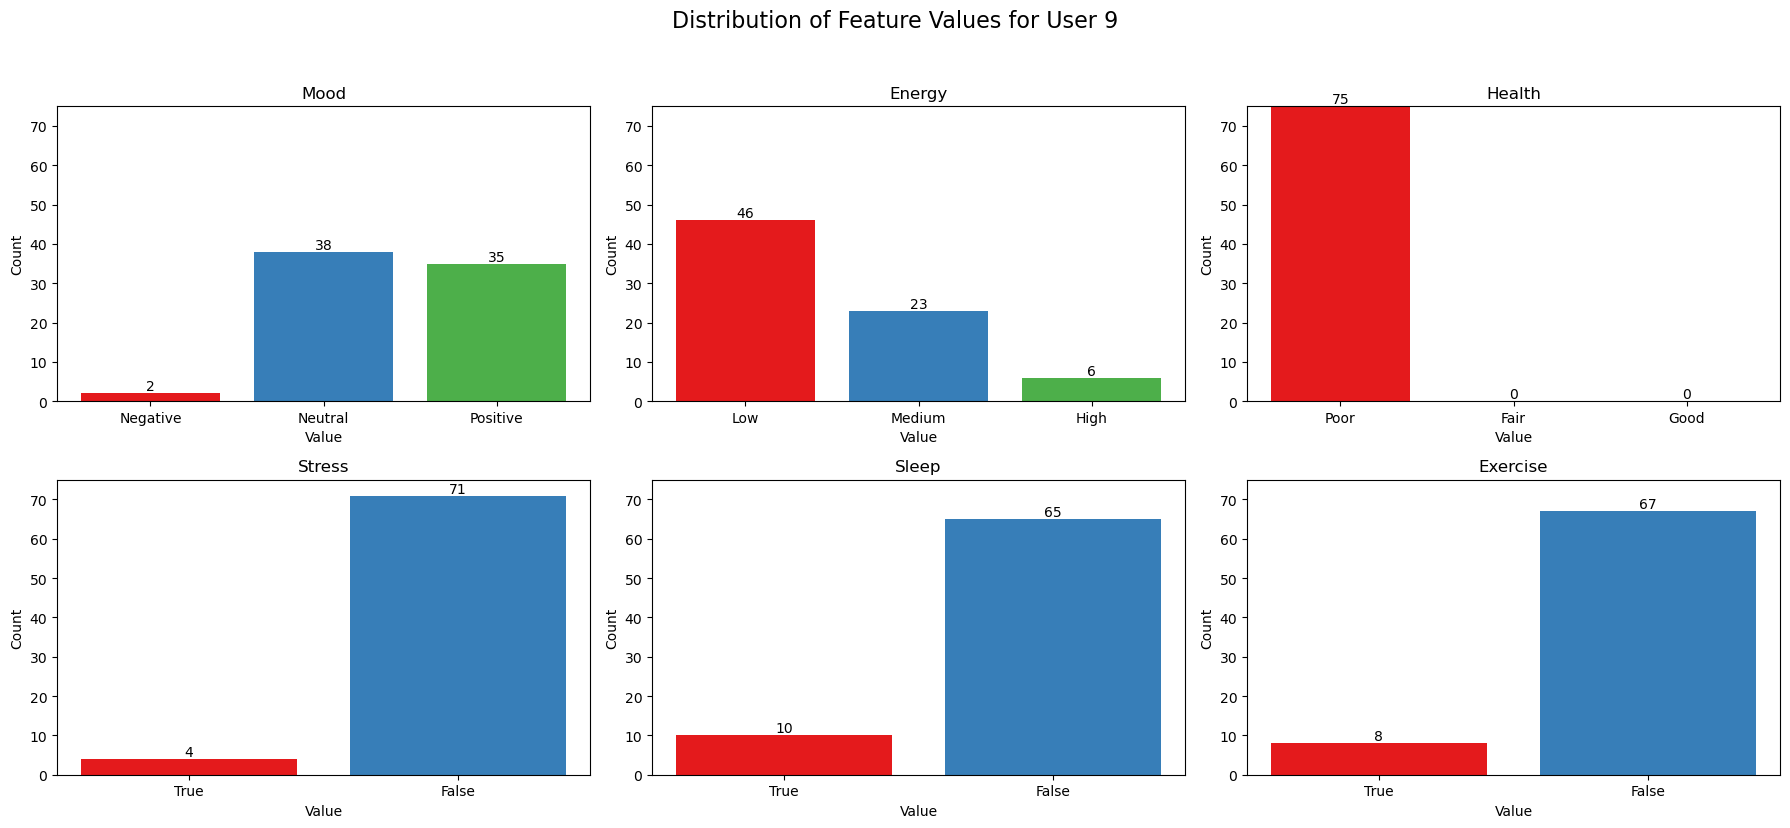

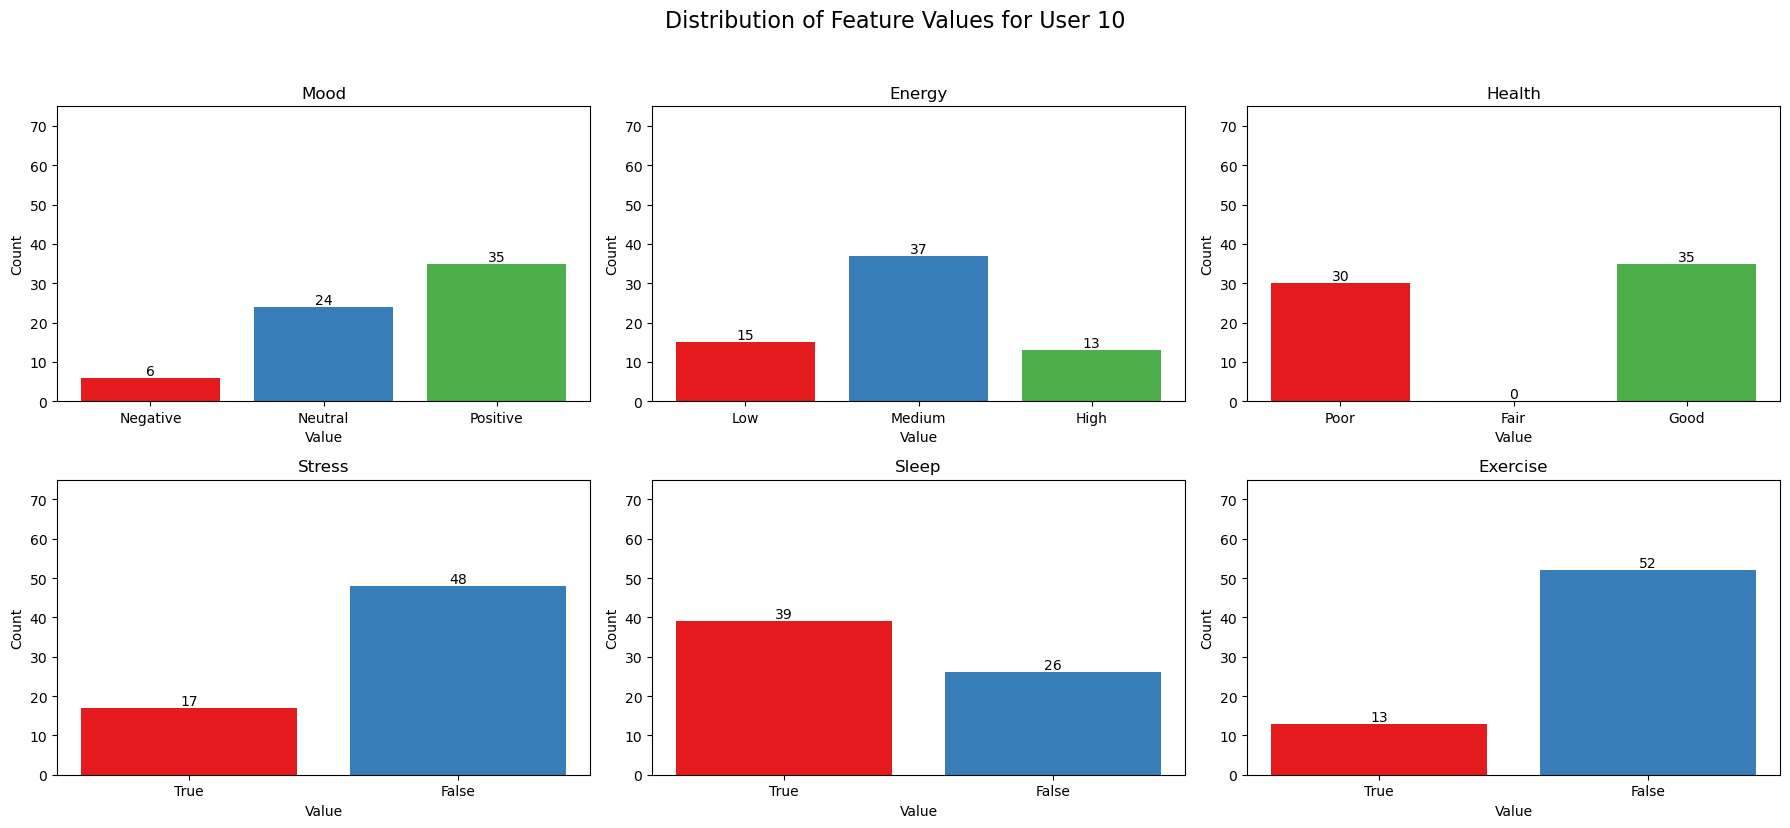

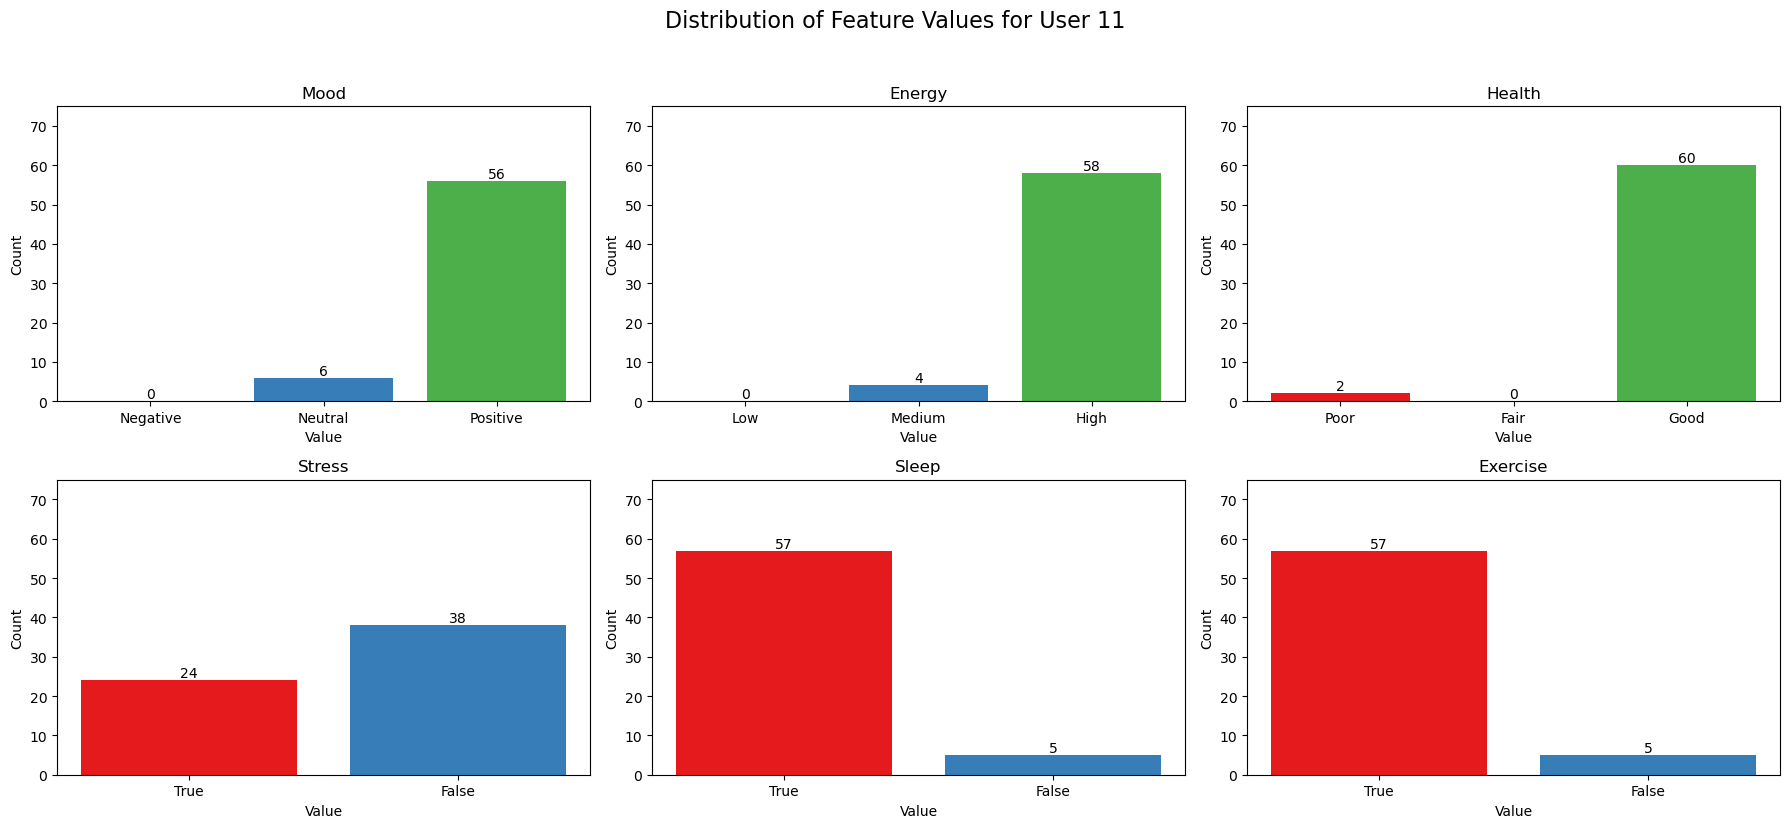

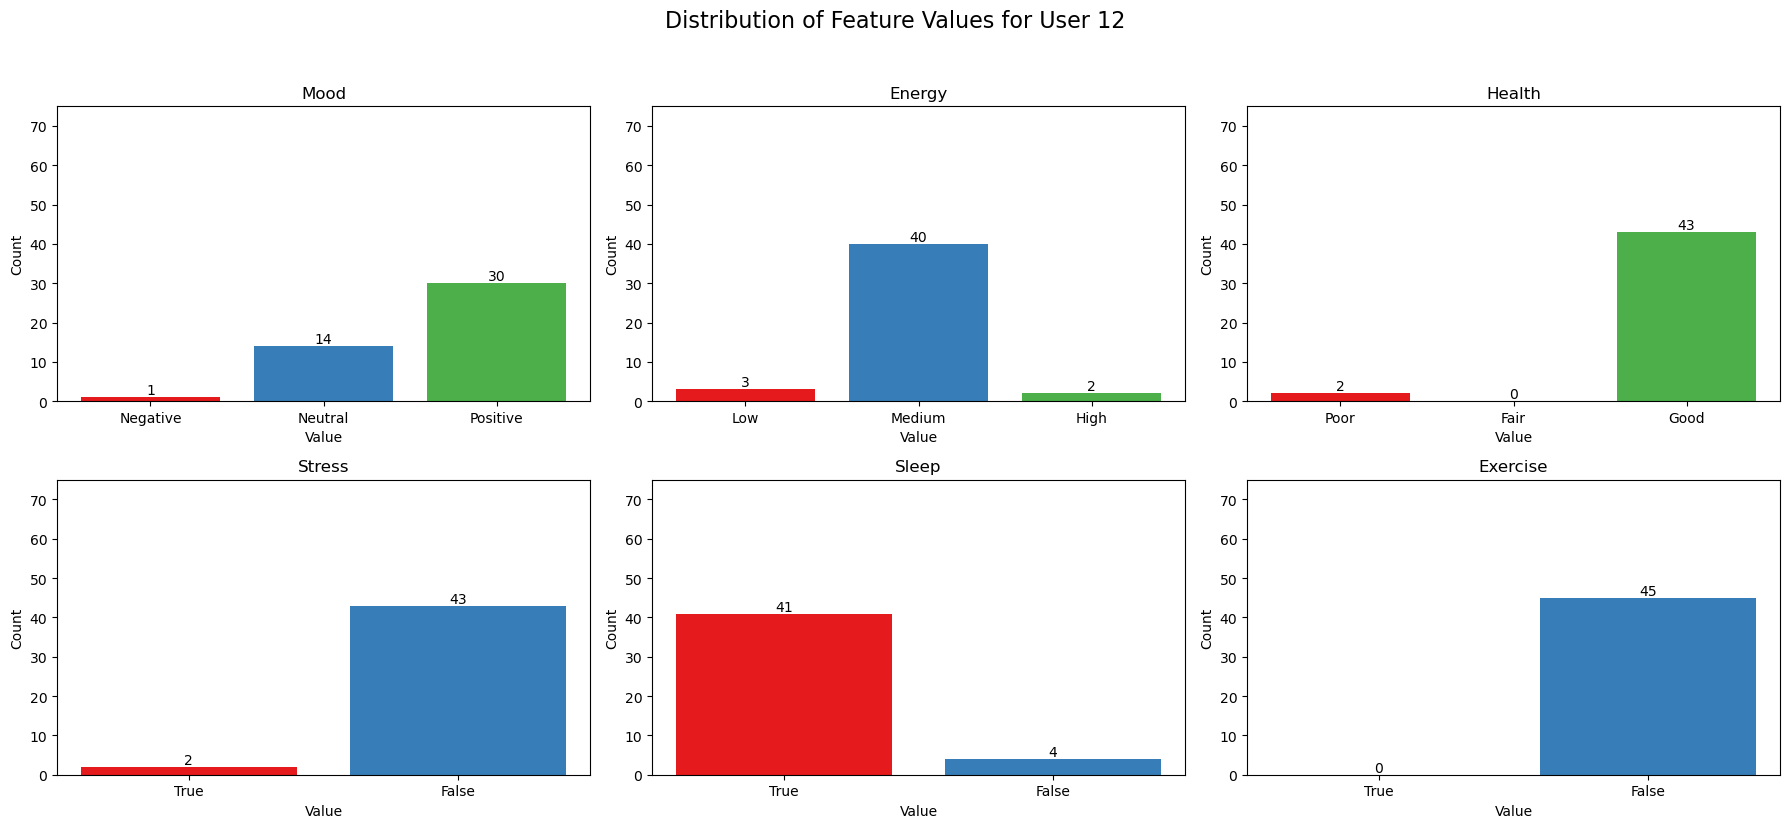

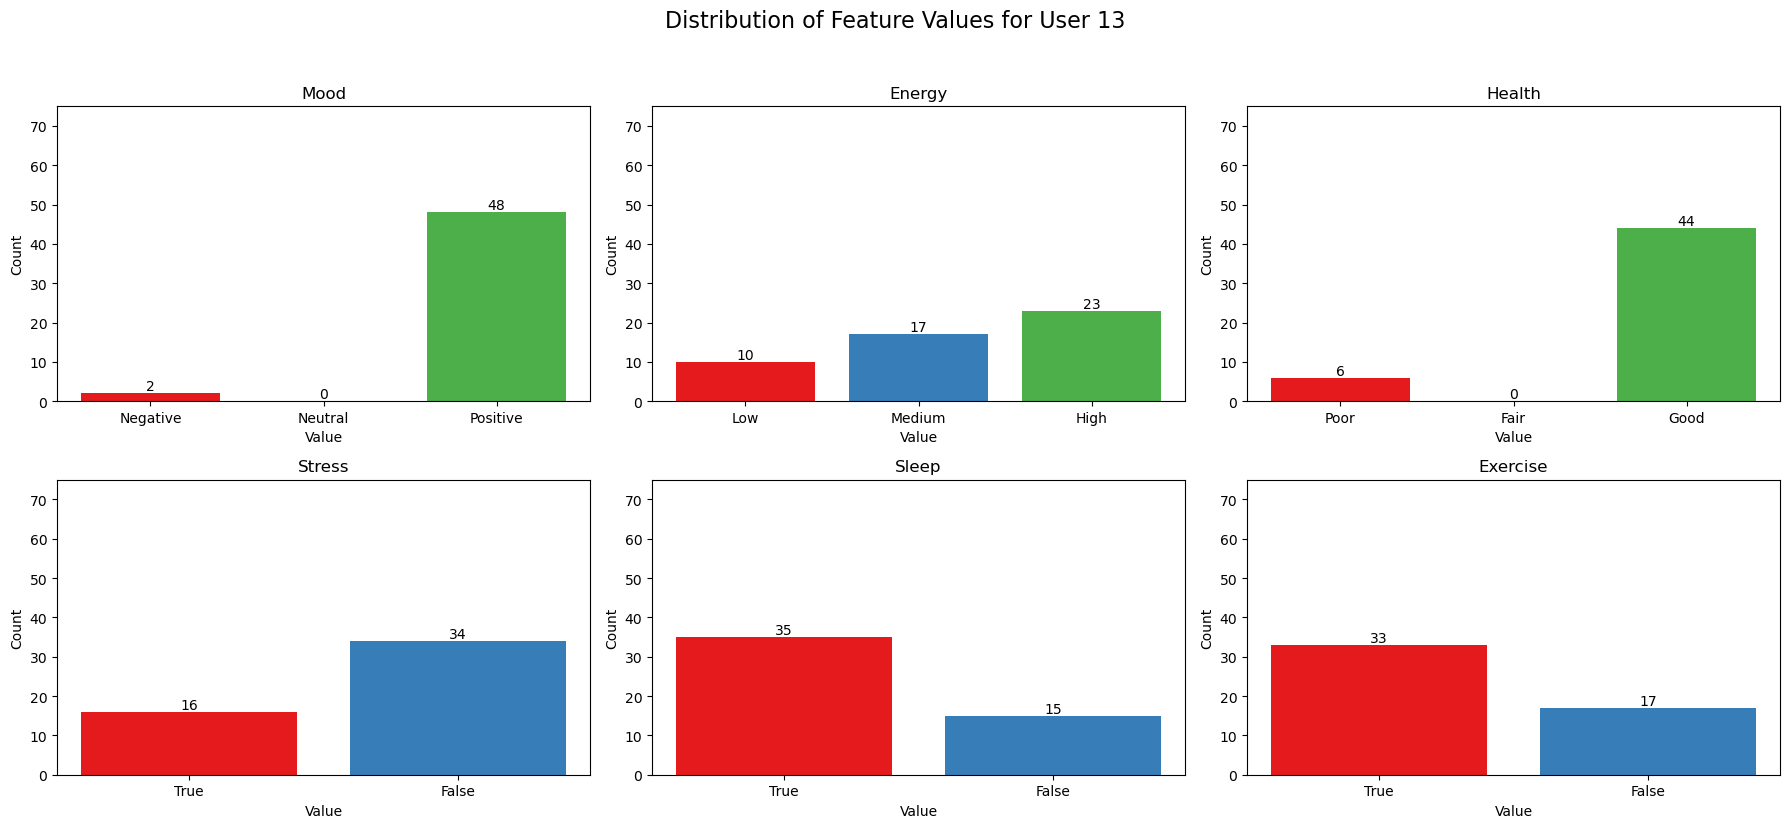

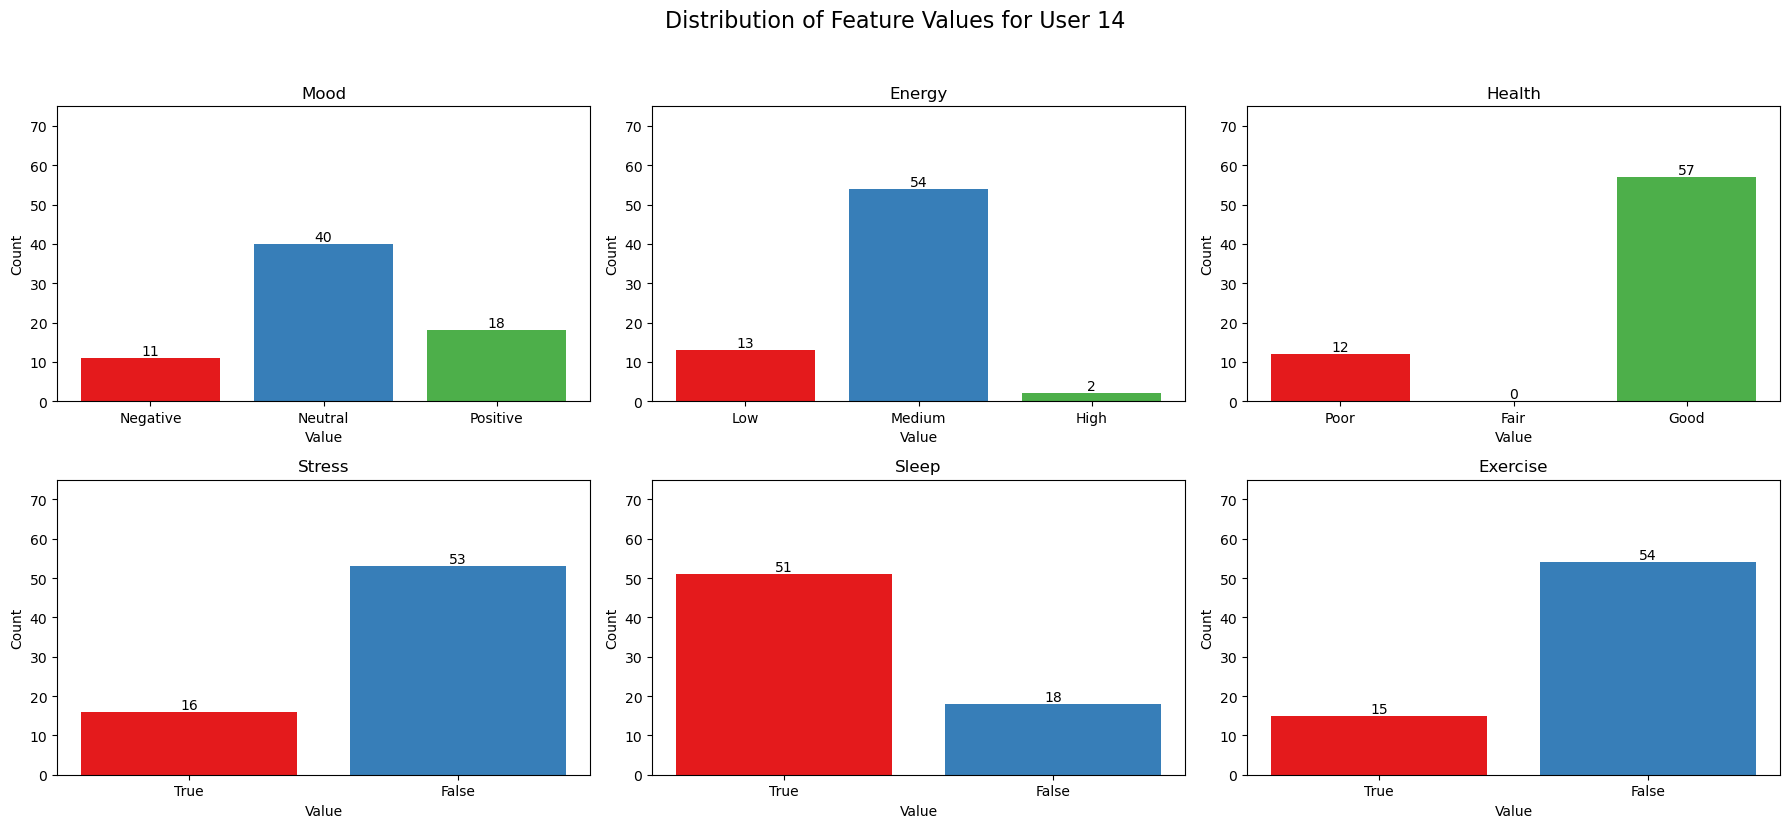

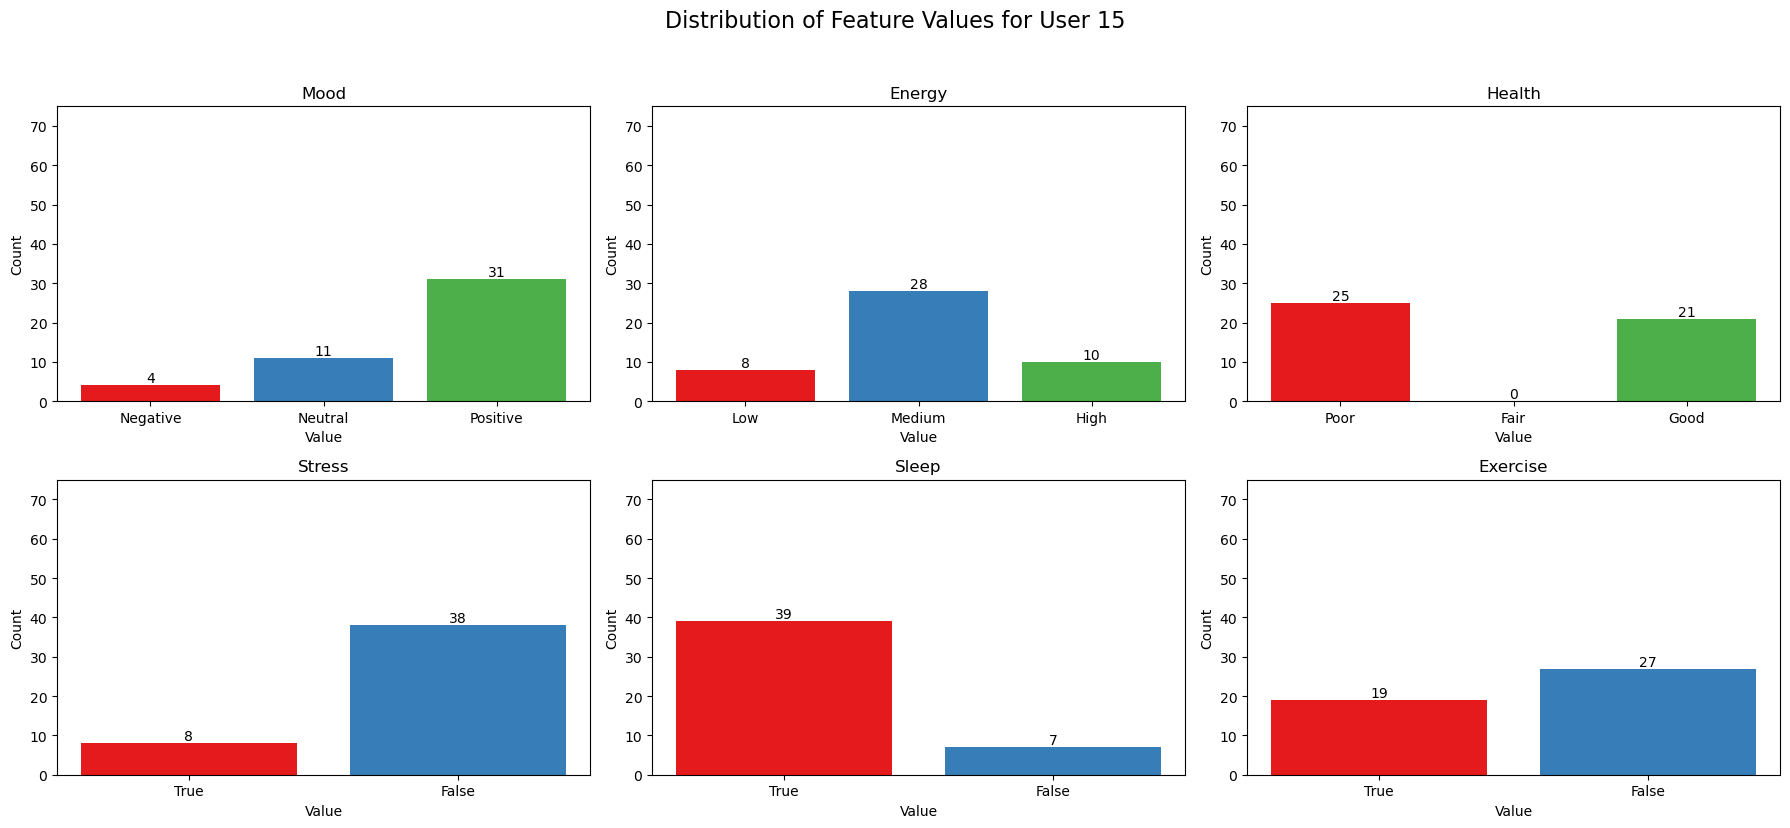

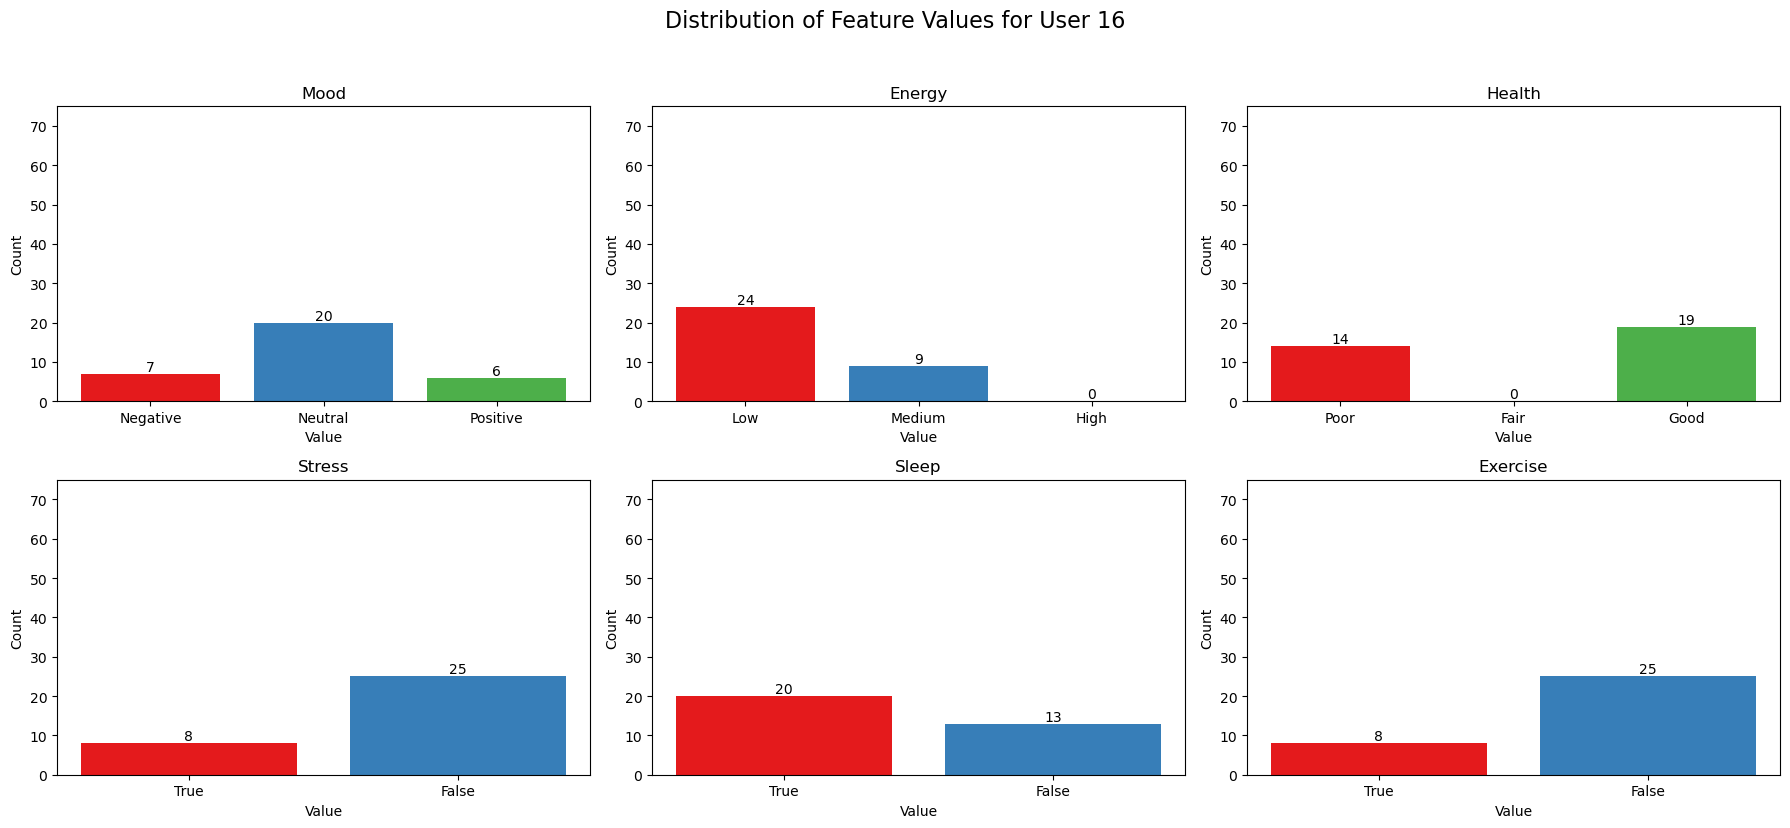

In [25]:
# For each user, plot the same set of bar charts for their data only
unique_users = data["rID"].unique()

# Define features, values, labels, and colors
triple_colors = ["#e41a1c", "#377eb8", "#4daf4a"]
bool_colors = ["#e41a1c", "#377eb8"]
triple_features = [
    ("mood", [-1, 0, 1], ["Negative", "Neutral", "Positive"]),
    ("energy", [-1, 0, 1], ["Low", "Medium", "High"]),
    ("health", [-1, 0, 1], ["Poor", "Fair", "Good"]),
]
bool_features = [
    ("stress", [True, False], ["True", "False"]),
    ("sleep", [True, False], ["True", "False"]),
    ("exercise", [True, False], ["True", "False"]),
]

# Get user order from the constant data file
constant_data = pd.read_csv("TSDA8-constant-data.csv")
ordered_user_ids = constant_data["rID"].tolist()

# Find the maximum count for y-axis scaling
max_count = 0
for user in ordered_user_ids:
    print(user)
    user_data = data[data["rID"] == user]
    for feature, values, _ in triple_features:
        counts = [(user_data[feature] == v).sum() for v in values]
        max_count = max(max_count, max(counts))
    for feature, values, _ in bool_features:
        bool_col = (
            user_data[feature]
            .astype(str)
            .str.upper()
            .map({"TRUE": True, "FALSE": False})
        )
        counts = [(bool_col == v).sum() for v in values]
        max_count = max(max_count, max(counts))

# Plot for each user in the order of the constant file
for idx, user in enumerate(ordered_user_ids):
    user_data = data[data["rID"] == user]
    if user_data.empty:
        continue
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))
    fig.suptitle(
        f"Distribution of Feature Values for User {idx+1}", fontsize=16, y=1.03
    )
    # Triple-valued features
    for fidx, (feature, values, labels) in enumerate(triple_features):
        ax = axes[0, fidx]
        counts = [(user_data[feature] == v).sum() for v in values]
        if sum(counts) == 0:
            ax.axis("off")
            continue
        bars = ax.bar(labels, counts, color=triple_colors)
        ax.set_title(feature.capitalize())
        ax.set_xlabel("Value")
        ax.set_ylabel("Count")
        ax.set_ylim(0, max_count)
        # Add count labels
        for bar, count in zip(bars, counts):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                str(count),
                ha="center",
                va="bottom",
                fontsize=10,
            )
    # Boolean features
    for fidx, (feature, values, labels) in enumerate(bool_features):
        ax = axes[1, fidx]
        bool_col = (
            user_data[feature]
            .astype(str)
            .str.upper()
            .map({"TRUE": True, "FALSE": False})
        )
        counts = [(bool_col == v).sum() for v in values]
        if sum(counts) == 0:
            ax.axis("off")
            continue
        bars = ax.bar(labels, counts, color=bool_colors)
        ax.set_title(feature.capitalize())
        ax.set_xlabel("Value")
        ax.set_ylabel("Count")
        ax.set_ylim(0, max_count)
        # Add count labels
        for bar, count in zip(bars, counts):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                str(count),
                ha="center",
                va="bottom",
                fontsize=10,
            )
    plt.tight_layout()
    plt.show()

In [ ]:
# Find and print the rID(s) present in Task 1 but missing in Task 3.
task1_df = pd.read_csv("../Task 1/TSDA8-daily-data-filtered.csv")
task3_df = pd.read_csv("TSDA8-constant-data.csv")

task1_rids = set(task1_df["rID"].unique())
task3_rids = set(task3_df["rID"].unique())

missing_rids = task1_rids - task3_rids
print("rID(s) present in Task 1 but missing in Task 3:", missing_rids)